### Bayesian Statistics

Bayes theorem is used to update probability distributions after obtaining new data. Given two events, $A$ and $B$, the conditional probability if $A$ given $B$ is given by:

\begin{align}
    P(A | B) = \frac{P(B | A) P(A)}{P(B)}
\end{align}

where $P(A)$ is the *prior* probability distribution of $A$, $P(B)$ is the *evidence*, and $P(B|A)$ is the *likelihood* function. The likelihood function is the probability distribution of the evidence given that $A$ is true.

#### Example

You assume the average age, $a$, of people at CERN is in the range $[20, 80]$. The prior distribution for the average age is given by

\begin{align}
    P(a) = \frac{1}{(80 - 20)} \Theta (20 - a)\Theta (80 - a)
\end{align}

The ages of 25 people are given to you, denoted as $ \overline{m} $. The likelihood function is given by

\begin{align}
    P(\overline{m}|a) = \prod_i \frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}\left( m_i - a \right)^2}
\end{align}

The evidence is given by

\begin{align}
    P(\overline{m}) = \int P(a) P(\overline{m} | a) da
\end{align}

In [2]:
import time
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams['font.sans-serif'] = "Times New Roman"

In [3]:
# Produce data set of recorded ages with mean 53 and standard deviation 10.
actual_average = 53.0
actual_spread = 10.0
ages = np.random.normal(actual_average, actual_spread, 25)

average_values = np.linspace(20, 80, 1000)

print(ages)

[72.51794039 43.14275236 64.80352943 63.21856455 40.90738556 58.405674
 52.44831909 49.5511605  60.56321991 44.8333287  54.07306796 51.74962069
 58.11712511 47.95137857 44.36776004 57.37115097 58.26159771 40.57375502
 42.88252265 50.6913743  53.53919351 60.09017869 50.75767422 40.51820625
 76.02495868]


In [4]:
from mpmath import mpf

# Calculate probability of x given a flat Probability Density Function (PDF) between x_low and x_high.
def flat_probability(x, x_low, x_high):
    return 1/float(x_high - x_low) * (x_low <= x) * (x <= x_high)

# Calculate the probabilty of the data given the model.
def probability_model_parameters(data, prediction):
    total_prod = 1.0
    for datum in data:
        total_prod *= mpf((1 / (np.sqrt(2 * np.pi))) * np.exp(-0.5 * np.power((datum - prediction), 2)))
    return total_prod

# Calculate Bayesian quantities given the data and the range of the model
def bayes_parameters(data, values):
    
    evidence = 0
    
    priors = []
    likelihoods = []
    posteriors = []
    
    delta = values[1] - values[0]
    
    for value in values:
        
        # Calculate prior distribution value (flat distirbution)
        prior = flat_probability(value, np.min(values), np.max(values))
        priors.append(prior)
        
        # Calculate likelihood of the data given the model value
        likelihood = probability_model_parameters(data, value)
        likelihoods.append(likelihood)
        
        # Calculate the numerator of the posterior (prior * likelihood)
        posterior = prior * likelihood
        posteriors.append(posterior)
        
        # Calculate the evidence
        evidence += posterior * delta
    
    #Calculate the full posterior with evidence calcualted
    posteriors = [posterior / evidence for posterior in posteriors]
    
    # Return all information
    return priors, likelihoods, evidence, posteriors

In [13]:
# Calcuate all Bayesian information on the problem
priors, likelihoods, evidence, posteriors = bayes_parameters(ages, average_values)

(0.0, 0.021666666666666667)

<Figure size 432x288 with 0 Axes>

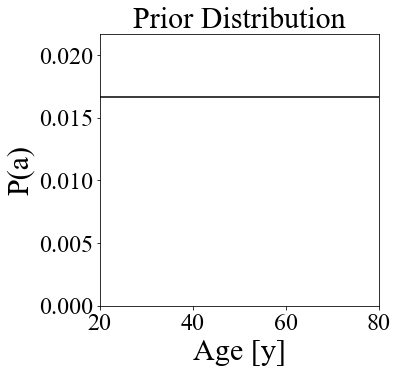

In [14]:
plt.clf()
fig = plt.figure(figsize=(5,5))

plt.title('Prior Distribution', fontsize=30)

plt.plot(average_values, priors, color="k", label="P")

plt.xlabel('Age [y]', fontsize=30)
plt.ylabel('P(a)', fontsize=30)

plt.tick_params(labelsize=24)

plt.xlim(np.min(average_values), np.max(average_values))
plt.ylim(0.0, 1.3 * np.max(priors))

(0.0, 2.501953884376334)

<Figure size 432x288 with 0 Axes>

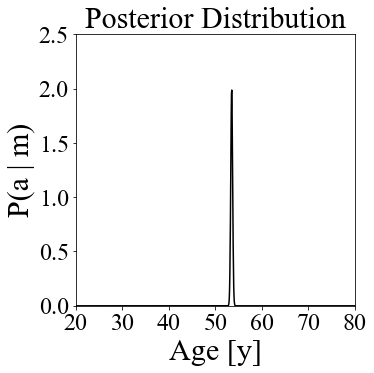

In [19]:
plt.clf()
fig = plt.figure(figsize=(5,5))

plt.title('Posterior Distribution', fontsize=30)

plt.plot(average_values, posteriors, color="k", label="P")

plt.xlabel('Age [y]', fontsize=30)
plt.ylabel('P(a | m)', fontsize=30)

plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

plt.xlim(np.min(average_values), np.max(average_values))
ymin,ymax = plt.ylim()
plt.ylim(0.0, 1.2 * ymax)

The probability density function for the estimate of the average age has been changed by the additional knowlege of the 25 people. If the ages of an additional 25 people are collected, the distribution will change again. Now, the previous posterior PDF is the new prior distribution.

In [21]:
ages = np.random.normal(actual_average, actual_spread, 25)

In [22]:
# Perform Bayesian quantites for the new prior.
def bayes_calculation(priors, likelihoods, delta):
    evidence = 0
    posteriors = []
    
    for prior, likelihood in zip(priors, likelihoods):
        
        posterior = prior * likelihood
        posteriors.append(posterior)
        
        evidence += posterior * delta
    
    posteriors = [posterior / evidence for posterior in posteriors]
    
    return priors, likelihoods, evidence, posteriors

In [24]:
priors, likelihoods, evidence, posteriors = bayes_calculation(
    posteriors, 
    [probability_model_parameters(ages, value) for value in average_values], 
    average_values[1] - average_values[0]
)

<Figure size 432x288 with 0 Axes>

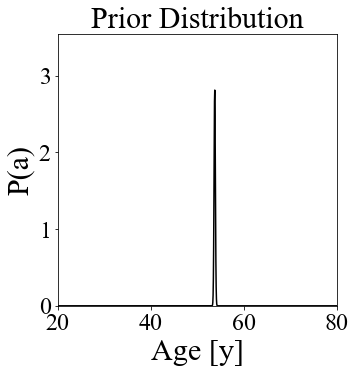

In [29]:
plt.clf()
fig = plt.figure(figsize=(5,5))

plt.title('Prior Distribution', fontsize=30)

plt.plot(average_values, priors, color="k", label="P")

plt.xlabel('Age [y]', fontsize=30)
plt.ylabel('P(a)', fontsize=30)

plt.tick_params(labelsize=24)

plt.xlim(np.min(average_values), np.max(average_values))
ymin,ymax = plt.ylim()
plt.ylim(0.0, 1.2 * ymax)

plt.show()

<Figure size 432x288 with 0 Axes>

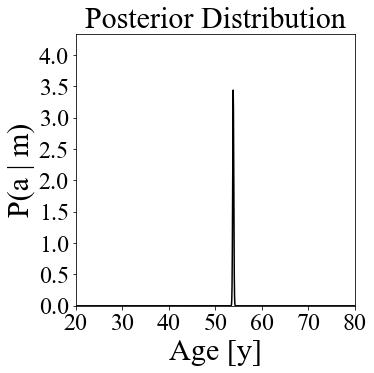

In [30]:
plt.clf()
fig = plt.figure(figsize=(5,5))

plt.title('Posterior Distribution', fontsize=30)

plt.plot(average_values, posteriors, color="k", label="P")

plt.xlabel('Age [y]', fontsize=30)
plt.ylabel('P(a | m)', fontsize=30)

plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

plt.xlim(np.min(average_values), np.max(average_values))
ymin,ymax = plt.ylim()
plt.ylim(0.0, 1.2 * ymax)

plt.show()

The posterior distribution has narrowed further due to the additional information.